<a href="https://colab.research.google.com/github/Areeb-07/EE-769/blob/main/EE_769_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 769 Project

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import re
import random

### Downloading the dataset

In [99]:
!gdown 1mglhIqLPtXBv-QXzQI1ucfMxoQjFCIBs

Downloading...
From (original): https://drive.google.com/uc?id=1mglhIqLPtXBv-QXzQI1ucfMxoQjFCIBs
From (redirected): https://drive.google.com/uc?id=1mglhIqLPtXBv-QXzQI1ucfMxoQjFCIBs&confirm=t&uuid=346df880-c2af-4bdd-b369-a8862a17bb79
To: /content/all_talks_train.tsv
100% 848M/848M [00:14<00:00, 57.5MB/s]


In [100]:
data = pd.read_csv('/content/all_talks_train.tsv', sep = '\t')

The dataset contains 258098 sentences translated into 60 languages. As can be seen below, some of the fields are null

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258098 entries, 0 to 258097
Data columns (total 61 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   talk_name  258098 non-null  object
 1   en         258098 non-null  object
 2   es         258088 non-null  object
 3   pt-br      258098 non-null  object
 4   fr         258098 non-null  object
 5   ru         258098 non-null  object
 6   he         258097 non-null  object
 7   ar         258098 non-null  object
 8   ko         258098 non-null  object
 9   zh-cn      258098 non-null  object
 10  it         258098 non-null  object
 11  ja         258097 non-null  object
 12  zh-tw      258098 non-null  object
 13  nl         258098 non-null  object
 14  ro         258039 non-null  object
 15  tr         258098 non-null  object
 16  de         257874 non-null  object
 17  vi         258098 non-null  object
 18  pl         257889 non-null  object
 19  pt         258098 non-null  object
 20  bg  

In [102]:
data.fillna('', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258098 entries, 0 to 258097
Data columns (total 61 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   talk_name  258098 non-null  object
 1   en         258098 non-null  object
 2   es         258098 non-null  object
 3   pt-br      258098 non-null  object
 4   fr         258098 non-null  object
 5   ru         258098 non-null  object
 6   he         258098 non-null  object
 7   ar         258098 non-null  object
 8   ko         258098 non-null  object
 9   zh-cn      258098 non-null  object
 10  it         258098 non-null  object
 11  ja         258098 non-null  object
 12  zh-tw      258098 non-null  object
 13  nl         258098 non-null  object
 14  ro         258098 non-null  object
 15  tr         258098 non-null  object
 16  de         258098 non-null  object
 17  vi         258098 non-null  object
 18  pl         258098 non-null  object
 19  pt         258098 non-null  object
 20  bg  

The null fields have been replaced with empty string

In [103]:
langs = list(data.columns[1:])

### Creating Vocabulary
For this project, I will use a shared vocabulary with upto 5000 words for each language


In [105]:
vocab = {}

for lang in langs:
    sentences = []
    for i in range(len(data)):
        sentences.extend([word.lower() for word in re.sub('&.*?;','',re.sub('\(.*?\)', '' , data[lang][i])).split() if word.isalpha() and word != 'NULL'])
    words_frequencies = {}
    for i in sentences:
        try:
            words_frequencies[i] += 1
        except:
            words_frequencies[i] = 1
    sorted_word_frequencies = sorted(words_frequencies.items(), key=lambda x:x[1], reverse=True)
    words = [sorted_word_frequencies[i][0] for i in range(min(5000, len(sorted_word_frequencies)))]

    vocab[lang] = words

To generate vocabulary, the sentences are first preprocessed. All the punctuations are removed. The audience reactions are like laughter etc. are also mentioned in these sentences enclosed in parantheses. The regular expression '\(.*?\)' matches these and removes. Also, some characters like apostrophe, quotes are represented like & apos; and & quot;. The regular expression '&.*?;' is used to remove them. Also, some languages do not have translations for certain sentences. These fields are filled with '__NULL__'. This has also been removed. isalpha() only keeps the letters and removes punctuations and numbers etc.
This is done for all the sentences for each language. Then the words from each of the sentences are combined into a single set, thus retaining only unique words. Further, frequency of each word is calculated in the dataset. The top 5000 most frequent words are kept finally.

#### Language aginst the number of words in the vocabulary

In [106]:
for i in vocab.keys():
    print(i, len(vocab[i]))

en 5000
es 5000
pt-br 5000
fr 5000
ru 5000
he 5000
ar 5000
ko 5000
zh-cn 5000
it 5000
ja 5000
zh-tw 5000
nl 5000
ro 5000
tr 5000
de 5000
vi 5000
pl 5000
pt 5000
bg 5000
el 5000
fa 5000
sr 5000
hu 5000
hr 5000
uk 5000
cs 5000
id 5000
th 5000
sv 5000
sk 5000
sq 5000
lt 5000
da 5000
calv 0
my 3561
sl 5000
mk 5000
fr-ca 5000
fi 5000
hy 5000
hi 1667
nb 5000
ka 5000
mn 5000
et 5000
ku 5000
gl 5000
mr 1313
zh 5000
ur 5000
eo 5000
ms 5000
az 5000
ta 1058
bn 1065
kk 5000
be 5000
eu 5000
bs 5000


The language calv does not have any word in the vocabulary. Thus it is deleted from the list of languages.

In [107]:
del vocab['calv']
langs.remove('calv')

### Creating a single dictionary for combined vocabulary.

In [ ]:
vocabulary = {}
vocab_size = len(langs) + 2
for i in vocab.keys():
    for j in vocab[i]:
        vocabulary[j] = vocab_size
        vocab_size += 1
vocabulary

{'the': 274407,
 'and': 275683,
 'to': 273731,
 'of': 277261,
 'a': 273748,
 'that': 258553,
 'i': 273725,
 'in': 276148,
 'it': 253731,
 'you': 257193,
 'we': 251334,
 'is': 257557,
 's': 273795,
 'this': 52452,
 'so': 228937,
 'they': 76,
 'was': 170414,
 'for': 278658,
 'are': 269560,
 'have': 173124,
 'but': 184211,
 'what': 170901,
 'on': 273821,
 'with': 250097,
 'can': 254113,
 't': 257463,
 'about': 87,
 'there': 171086,
 'be': 257562,
 'as': 278410,
 'at': 253235,
 'not': 257356,
 'all': 276598,
 'my': 258331,
 'do': 273776,
 'one': 273838,
 'people': 171156,
 're': 155209,
 'like': 200548,
 'if': 52606,
 'from': 172310,
 'our': 171598,
 'now': 171802,
 'or': 184720,
 'just': 253762,
 'an': 275764,
 'these': 107,
 'he': 188636,
 'when': 173298,
 'because': 110,
 'me': 273837,
 'very': 112,
 'out': 199996,
 'by': 254641,
 'how': 257537,
 'them': 155197,
 'know': 117,
 'going': 118,
 'more': 276547,
 'up': 277281,
 'had': 170645,
 'think': 53834,
 'who': 250972,
 'their': 170642

### Appending the language tokens and end of sentence token to the vocabulary

In [ ]:
for i in range(len(langs)):
    vocabulary[f'<{langs[i]}>'] = i + 2
vocabulary['<EOS>'] = 1

In [ ]:
vocab_size

278725

### Function that converts a list of words to a vector of labels for each word, using the shared vocabulary

In [7]:
def sentence_to_vector(sentence):

    result = np.zeros((100))
    for i in range(len(sentence)):
        try:
            index = vocabulary[sentence[i]]
            result[i] = index
        except:
            result[i] = 0
    return result

In [ ]:
sentence_to_vector(['my','name','is','areeb'])[:6]

array([258331., 176014., 257557.,      0.,      0.,      0.])

The first three words are contained in the vocabulary. Thus, they have been assigned a label each. For the unidentified word, a label of 0 is assigned.

### Function to process a statement and convert to a list of words
The only difference in the processing of text from the processing of sentences to make vocabulary is that numbers are retained here. They will be assigned unidentified token.

In [8]:
def prepare_sentence(sentence):

    words = [word.lower() for word in re.sub('&.*?;','',re.sub('\(.*?\)', '' , sentence)).split() if word.isalnum() and word != 'NULL']

    return words

### Function to convert a list of words to output vector with an additional shape, thus matching the shape of the output of the model.

In [9]:
def sentence_to_output_vector(sentence):

    result = np.zeros((100, 1))
    for i in range(len(sentence)):
        try:
            index = vocabulary[sentence[i]]
            result[i][0] = index
        except:
            result[i][0] = 0
    return result

### Preparing the training data
A pair of languages is randomly selected from the dataset and processed before being appended to the training dataset. All sentences are converted to vectors of length 100 (the maximum length of sentence allowed by the model). End of sentence token is appended to the lists of input and output sentences. In the input sentence, a token determining target language is also appended.

In [ ]:
train_input = []
train_output = []
for i in range(len(data) // 3):
    valid_langs = []
    for j in langs:
        if len(prepare_sentence(data[j][i])) > 0:
            valid_langs.append(j)
    if len(valid_langs) > 1:
        choices = random.sample(valid_langs, k = 2)
        input_sentence = prepare_sentence(data[choices[0]][i])
        output_sentence = prepare_sentence(data[choices[1]][i])
        if len(input_sentence) > 98:
          continue
        if len(output_sentence) > 99:
          continue
        input_sentence.insert(0, f'<{choices[1]}>')
        input_sentence.append('<EOS>')
        train_vector = sentence_to_vector(input_sentence)
        train_input.append(train_vector)
        output_sentence.append('<EOS>')
        train_output.append(sentence_to_output_vector(output_sentence))
train_input = np.array(train_input)
train_output = np.array(train_output)

### Importing TensorFlow and required layers for model training

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Concatenate,Input, Bidirectional, Embedding, MultiHeadAttention, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

### Creating the Model

In [ ]:
input = Input(shape=(100,))
embedding = Embedding(vocab_size, 200) (input)
encoder_lstm1 = Bidirectional(LSTM(128, return_sequences=True)) (embedding)
encoder_lstm2 = LSTM(80, return_sequences=True) (encoder_lstm1)
encoder_lstm3 = LSTM(60, return_sequences=True) (encoder_lstm2)
encoder_conc1 = Concatenate() ([encoder_lstm2,encoder_lstm3])
encoder_lstm4 = LSTM(54, return_sequences=True) (encoder_conc1)
encoder_conc2 = Concatenate() ([encoder_conc1,encoder_lstm4])
encoder_lstm5 = LSTM(40, return_sequences=True) (encoder_conc2)
encoder_conc3 = Concatenate() ([encoder_conc2,encoder_lstm5])
encoder_lstm6 = LSTM(32, return_sequences=True) (encoder_conc3)
encoder_conc4 = Concatenate() ([encoder_conc3,encoder_lstm6])
encoder_lstm7 = LSTM(24, return_sequences=True) (encoder_conc4)
encoder_conc5 = Concatenate() ([encoder_conc4,encoder_lstm7])
encoder_lstm8 = LSTM(16, return_sequences=True) (encoder_conc5)
attention = MultiHeadAttention(num_heads=10,key_dim=12) (encoder_lstm8,encoder_lstm8)
decoder_lstm1 = LSTM(16, return_sequences=True) (attention)
decoder_lstm2 = LSTM(24, return_sequences=True) (decoder_lstm1)
decoder_lstm3 = LSTM(32, return_sequences=True) (decoder_lstm2)
decoder_conc1 = Concatenate() ([decoder_lstm2,decoder_lstm3])
decoder_lstm4 = LSTM(40, return_sequences=True) (decoder_conc1)
decoder_conc2 = Concatenate() ([decoder_conc1,decoder_lstm4])
decoder_lstm5 = LSTM(54, return_sequences=True) (decoder_conc2)
decoder_conc3 = Concatenate() ([decoder_conc2,decoder_lstm5])
decoder_lstm6 = LSTM(60, return_sequences=True) (decoder_conc3)
decoder_conc4 = Concatenate() ([decoder_conc3,decoder_lstm6])
decoder_lstm7 = LSTM(80, return_sequences=True) (decoder_conc4)
decoder_conc5 = Concatenate() ([decoder_conc4,decoder_lstm7])
decoder_lstm8 = LSTM(128, return_sequences=True) (decoder_conc5)
dense = Dense(1, activation="relu") (decoder_lstm8)
model = tf.keras.models.Model(input, dense)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 100, 200)             5574500   ['input_2[0][0]']             
                                                          0                                       
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 100, 256)             336896    ['embedding_1[0][0]']         
 onal)                                                                                            
                                                                                            

### A plot of the Model Architecture

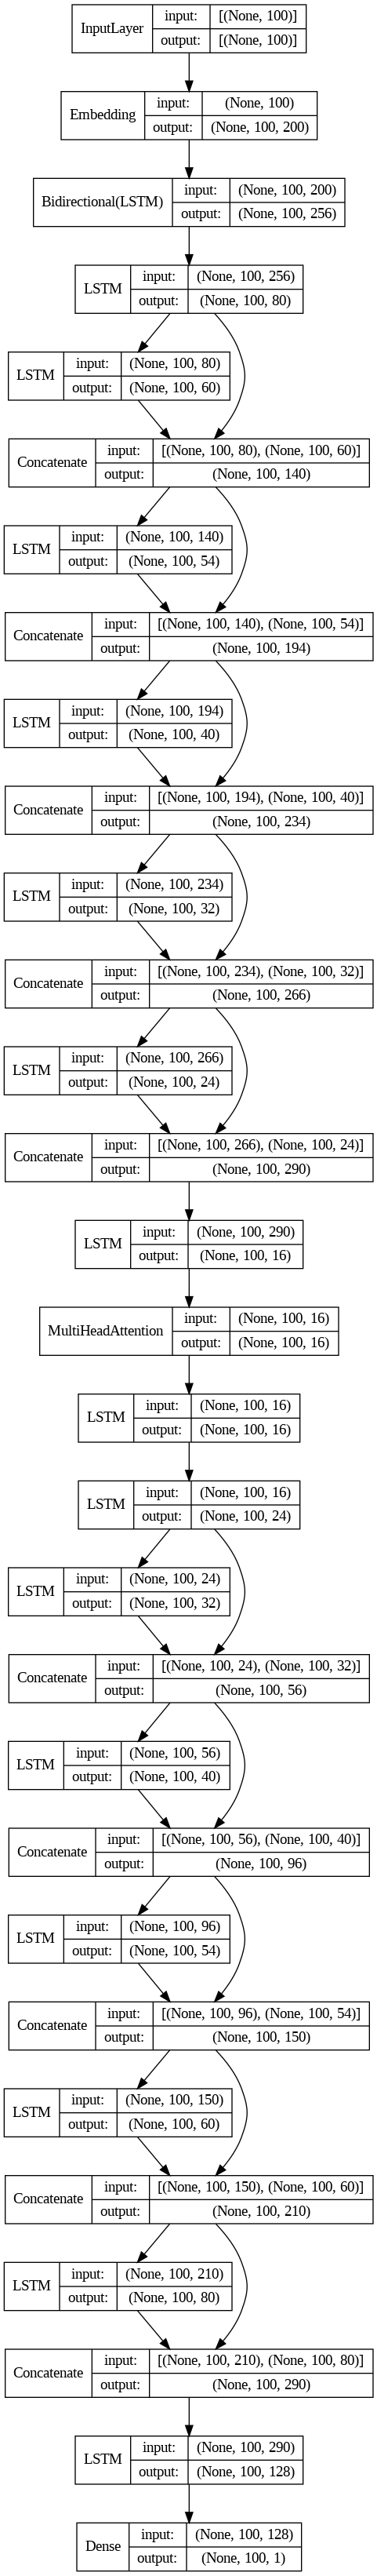

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=False)

### A custom loss function for training (effectively mean absolute error)

In [10]:
def custom_loss(y_true, y_pred):
    return tf.math.reduce_mean(tf.math.abs(tf.math.subtract(y_true, y_pred)))

### Compiling and training the model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(200),loss=custom_loss,metrics=[custom_loss])
history = model.fit(train_input, train_output, epochs=10)

Epoch 1/10
2508/2508 [==============================] - 289s 102ms/step - loss: 17576.6328 - custom_loss: 17583.5430
Epoch 2/10
2508/2508 [==============================] - 232s 92ms/step - loss: 17576.6074 - custom_loss: 17574.6562
Epoch 3/10
2508/2508 [==============================] - 232s 92ms/step - loss: 17576.6230 - custom_loss: 17575.7637
Epoch 4/10
2508/2508 [==============================] - 233s 93ms/step - loss: 17576.6211 - custom_loss: 17576.0039
Epoch 5/10
2508/2508 [==============================] - 230s 92ms/step - loss: 17576.6035 - custom_loss: 17573.5176
Epoch 6/10
2508/2508 [==============================] - 236s 94ms/step - loss: 17576.6465 - custom_loss: 17579.9492
Epoch 7/10
2508/2508 [==============================] - 231s 92ms/step - loss: 17576.6289 - custom_loss: 17582.1465
Epoch 8/10
2508/2508 [==============================] - 229s 91ms/step - loss: 17576.6348 - custom_loss: 17583.4082
Epoch 9/10
2508/2508 [==============================] - 231s 92ms/step 

### Plot of Loss vs. epoch
Final loss is 17572 in a vocabulary size of over 250000. The error has been minimised but perhapse some more sophisticated loss function, more data, longer training, and a custom training algorithm is required for better training of the model, which is beyond the scope of this project due to hardware and time constraints.

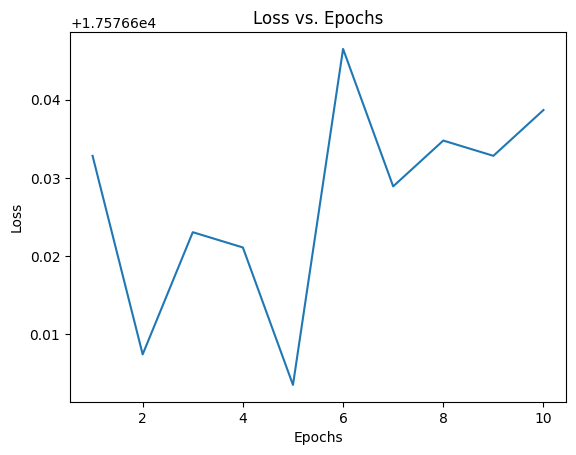

In [ ]:
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot([i + 1 for i in range(10)], history.history['loss'])

### Function to prepare input sentence for model

In [11]:
def prepare_input(sentence, target_lang):
    input_sentence = prepare_sentence(sentence)
    input_sentence.insert(0, f'<{target_lang}>')
    input_sentence.append('<EOS>')
    input_vector = sentence_to_vector(input_sentence)
    return np.array([input_vector])

### An inverse vocabulary to generate the output sentnce from model output

In [ ]:
inverse_vocabulary = {}
for i in vocabulary.keys():
    inverse_vocabulary[vocabulary[i]] = i

### Function to prepare output sentence using inverse vocabulary

In [45]:
def prepare_output(output):
    sentence = ""
    for i in output[0]:
        if i[0] == 0:
          continue
        try:
          word = inverse_vocabulary[int(i[0])]
        except:
          continue
        if word == '<EOS>':
            break
        sentence += word + " "
    return sentence.strip()

### Evaluating the model

In [ ]:
prepare_output(model.predict(prepare_input("Hello, how are you? I have been looking forward to meeting you.", "fr")))

1/1 [==============================] - 8s 8s/step


''

Since the model has ReLU activation, the indices will certainly be positive. Empty output string means that the model has predicted unknown for all output places. Such a poor performance could be expected, given the fact that model was very lightly trained, whereas a model with such a complex architecture should be traind for a much longer duration upto weeks, on more powerful hardware. We will try some postprecessing to improve the performance later.

### Saving the vocabulary and inverse vocabulary

In [ ]:
import pickle

with open('vocabulary.pickle', 'wb') as vocab_file:
    pickle.dump(vocabulary, vocab_file)

with open('inverse.pickle', 'wb') as inverse_file:
    pickle.dump(inverse_vocabulary, inverse_file)

### Saving the model

In [ ]:
model.save('translator.h5')

### Downloading the saved files to local computer

In [ ]:
from google.colab import files
files.download("vocabulary.pickle")
files.download("inverse.pickle")
files.download("translator.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Loading the model and evaluating the model (similar to how it will be done in deployment)

In [4]:
!gdown 1PtyIUtEXNsfUIySl4TrFnw_GKu9PYYmP
!gdown 1oWhOl6Z7p-rr29bzYlrrOAQ4_Z4Yz0mn
!gdown 1xo3ftTJ2pi5GS7NXVDyQRURrZojufjuX

Downloading...
From: https://drive.google.com/uc?id=1PtyIUtEXNsfUIySl4TrFnw_GKu9PYYmP
To: /content/vocabulary.pickle
100% 4.04M/4.04M [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oWhOl6Z7p-rr29bzYlrrOAQ4_Z4Yz0mn
To: /content/inverse.pickle
100% 4.04M/4.04M [00:00<00:00, 115MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1xo3ftTJ2pi5GS7NXVDyQRURrZojufjuX
From (redirected): https://drive.google.com/uc?id=1xo3ftTJ2pi5GS7NXVDyQRURrZojufjuX&confirm=t&uuid=c59f9af6-55f0-48ad-8639-d2e3d0fa4e68
To: /content/translator.h5
100% 682M/682M [00:08<00:00, 77.4MB/s]


### Loading the Vocabularies

In [5]:
import pickle

with open('/content/vocabulary.pickle', 'rb') as f:
    vocabulary=pickle.load(f)
with open('/content/inverse.pickle', 'rb') as f:
    inverse_vocabulary=pickle.load(f)

In [6]:
vocab_size=278725

### Loading the Model

In [13]:
new_model = tf.keras.models.load_model('/content/translator.h5', custom_objects={'custom_loss':custom_loss})
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 100, 200)             5574500   ['input_2[0][0]']             
                                                          0                                       
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 100, 256)             336896    ['embedding_1[0][0]']         
 onal)                                                                                            
                                                                                            

### Prediction using the model

In [15]:
prepare_output(new_model.predict(prepare_input("Amongst all the troubling deficits we struggle with today — we think of financial and economic primarily — the ones that concern me most is the deficit of political dialogue — our ability to address modern conflicts as they are , to go to the source of what they &apos;re all about and to understand the key players and to deal with them .", "fr")))

1/1 [==============================] - 9s 9s/step


''

Once again, we receive an empty string

### Inspecting the output from second last layer

In [17]:
layer_name = 'lstm_31'
intermediate_layer_model = Model(inputs=new_model.input,
                                 outputs=new_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(prepare_input("Amongst all the troubling deficits we struggle with today — we think of financial and economic primarily — the ones that concern me most is the deficit of political dialogue — our ability to address modern conflicts as they are , to go to the source of what they &apos;re all about and to understand the key players and to deal with them .", "fr"))
intermediate_output

1/1 [==============================] - 9s 9s/step


array([[[ 0.       ,  0.7615942,  0.7615942, ...,  0.       ,
          0.       , -0.       ],
        [ 0.       ,  0.7615942,  0.7615942, ...,  0.       ,
          0.       , -0.       ],
        [ 0.       ,  0.7615942,  0.7615942, ...,  0.       ,
          0.       , -0.       ],
        ...,
        [ 0.       ,  0.7615942,  0.7615942, ...,  0.       ,
          0.       , -0.       ],
        [ 0.       ,  0.7615942,  0.7615942, ...,  0.       ,
          0.       , -0.       ],
        [ 0.       ,  0.7615942,  0.7615942, ...,  0.       ,
          0.       , -0.       ]]], dtype=float32)

It acn be seen that the output of this layer is non zero. Thus, the problem is created by the last layer.

Sum of the ouput along last axis. All the values are negative. Thus the ReLU activation must have made the negative values 0. Therefore, the model only results in 0.

In [18]:
np.sum(intermediate_output, axis=2)

array([[-3.330725 , -3.0667868, -3.2567334, -3.5827453, -3.372132 ,
        -3.403137 , -3.3908572, -3.3874557, -3.3826506, -3.3781514,
        -3.3737688, -3.3695507, -3.3655477, -3.3617933, -3.3583252,
        -3.355169 , -3.3523393, -3.349836 , -3.3476481, -3.3457494,
        -3.3441088, -3.3426895, -3.3414562, -3.3403754, -3.3394156,
        -3.338551 , -3.3377624, -3.3370311, -3.3363445, -3.3356912,
        -3.3350642, -3.334457 , -3.3338654, -3.3332853, -3.332716 ,
        -3.3321524, -3.3315964, -3.3310447, -3.3304973, -3.329954 ,
        -3.329414 , -3.3288777, -3.3283446, -3.3278148, -3.3272872,
        -3.3267634, -3.3262427, -3.3257253, -3.325211 , -3.3247008,
        -3.324193 , -3.3236902, -3.3231907, -3.3226948, -3.3222032,
        -3.321716 , -3.3212333, -3.320755 , -3.3202808, -3.3198123,
        -3.319348 , -3.318889 , -3.3184352, -3.3179862, -3.3175435,
        -3.3171055, -3.3166742, -3.316249 , -3.315829 , -3.3154154,
        -3.3150082, -3.3146071, -3.3142123, -3.3

### Creating new model without ReLU activation

In [21]:
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=new_model.input,
                                 outputs=new_model.get_layer(layer_name).output)
intermediate_layer_model.layers[-1].activation = None
intermediate_output = intermediate_layer_model.predict(prepare_input("Amongst all the troubling deficits we struggle with today — we think of financial and economic primarily — the ones that concern me most is the deficit of political dialogue — our ability to address modern conflicts as they are , to go to the source of what they &apos;re all about and to understand the key players and to deal with them .", "fr"))
intermediate_output

1/1 [==============================] - 7s 7s/step


array([[[-12.547837 ],
        [-14.649846 ],
        [-14.434379 ],
        [-13.215339 ],
        [-12.507192 ],
        [-12.5845175],
        [-12.552455 ],
        [-12.543366 ],
        [-12.530771 ],
        [-12.518998 ],
        [-12.5075655],
        [-12.496594 ],
        [-12.486204 ],
        [-12.4764805],
        [-12.467515 ],
        [-12.459367 ],
        [-12.452071 ],
        [-12.445624 ],
        [-12.439992 ],
        [-12.435108 ],
        [-12.430888 ],
        [-12.427241 ],
        [-12.424071 ],
        [-12.421291 ],
        [-12.418824 ],
        [-12.416602 ],
        [-12.414575 ],
        [-12.412695 ],
        [-12.410928 ],
        [-12.409249 ],
        [-12.407638 ],
        [-12.406077 ],
        [-12.404556 ],
        [-12.403066 ],
        [-12.401602 ],
        [-12.400154 ],
        [-12.398725 ],
        [-12.397307 ],
        [-12.395901 ],
        [-12.394506 ],
        [-12.393119 ],
        [-12.391742 ],
        [-12.390372 ],
        [-1

The output in this case is indeed finite. However, all are negative and have very low variance. Thus the output should be scaled in order to derive the outputs in the region where, the vocabulary of the target language lies in the shared vocabulary.

The following are the indices of some words from French. These are the starting, middle and ending words in the French part of the vocabulary. Thus the output for French should start from 183626.

In [33]:
vocabulary['de'], vocabulary['les'], vocabulary['avoir'], vocabulary['honte'], vocabulary['récepteur']

(270019, 183626, 183726, 185753, 186955)

Similarly, the following are the indices of some words from Spanish. Thus the output for Spanish should start from 273988

In [93]:
vocabulary['si'], vocabulary['no'], vocabulary['los']

(273988, 274436, 275774)

### Output after appropriate scaling
The output is divided by the mean to get rid of negative sign and to bring them close to 1. Thus the resulting sentences will be around the starting point of vocabulary for target language.

In [34]:
intermediate_output = 18362 * intermediate_output / np.mean(intermediate_output)
intermediate_output

array([[[18513.973],
        [21615.424],
        [21297.51 ],
        [19498.85 ],
        [18454.   ],
        [18568.092],
        [18520.785],
        [18507.375],
        [18488.791],
        [18471.42 ],
        [18454.553],
        [18438.365],
        [18423.035],
        [18408.688],
        [18395.459],
        [18383.436],
        [18372.672],
        [18363.158],
        [18354.848],
        [18347.643],
        [18341.416],
        [18336.035],
        [18331.36 ],
        [18327.256],
        [18323.617],
        [18320.338],
        [18317.348],
        [18314.572],
        [18311.965],
        [18309.49 ],
        [18307.111],
        [18304.809],
        [18302.564],
        [18300.365],
        [18298.205],
        [18296.068],
        [18293.959],
        [18291.87 ],
        [18289.793],
        [18287.736],
        [18285.69 ],
        [18283.656],
        [18281.637],
        [18279.63 ],
        [18277.63 ],
        [18275.648],
        [18273.676],
        [1827

In [35]:
np.max(intermediate_output)

21615.424

### Function to generate Output with scaling

In [68]:
def generate_output(source, target, start):
    output = intermediate_layer_model.predict(prepare_input(source, target))
    output = start * output / np.mean(output)
    return prepare_output([output[0][:int(len(source)*1.2)]])

### Final Results

In [98]:
generate_output("Amongst all the troubling deficits we struggle with today — we think of financial and economic primarily — the ones that concern me most is the deficit of political dialogue — our ability to address modern conflicts as they are , to go to the source of what they &apos;re all about and to understand the key players and to deal with them .", "fr", 18362)

1/1 [==============================] - 0s 159ms/step


'биологии sacs déclaré sacs provoque emmené programmation mâle voter occupe talents apporte frappe muscle volant traverse infection réserve banques voyait actif défaut magnétique connait secteurs ignorance'

In [96]:
generate_output("Hello, how are you?", "es", 273988)

1/1 [==============================] - 0s 313ms/step


'potrebne ekonomiju dostupan razvije reagovati kolumbiji stanovnika hoda pobjeći mislili moglo kini postojanja svojih milijarde djece ono baliotsua funtzionatzeko'

While the result are not very accurate, the model is still functional. With a more sophisticated training algorithm, different loss, larger data, and longer training, the model will certainly imporve inperformance.